In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sagarkarar/onlinepokerdataset
from zipfile import ZipFile
dataset1 = '/content/onlinepokerdataset.zip'
with ZipFile(dataset1,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


100% 97.3k/97.3k [00:00<00:00, 252kB/s]
100% 97.3k/97.3k [00:00<00:00, 252kB/s]
The dataset is extracted


***Reading the edge data and Creating the network***

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to read data from the .edges file
def read_edges_file(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as file:
        for line in file:
            try:
                source, target, weight = map(int, line.strip().split())
                G.add_edge(source, target, weight=weight)
            except ValueError:
                print(f"Skipping line: {line.strip()} (Invalid format)")
                continue
    return G

# Define the file path
file_path = '/content/Poker_modified.edges'

# Read the graph data from the .edges file
G = read_edges_file(file_path)

# Get the list of all players
players = list(G.nodes())



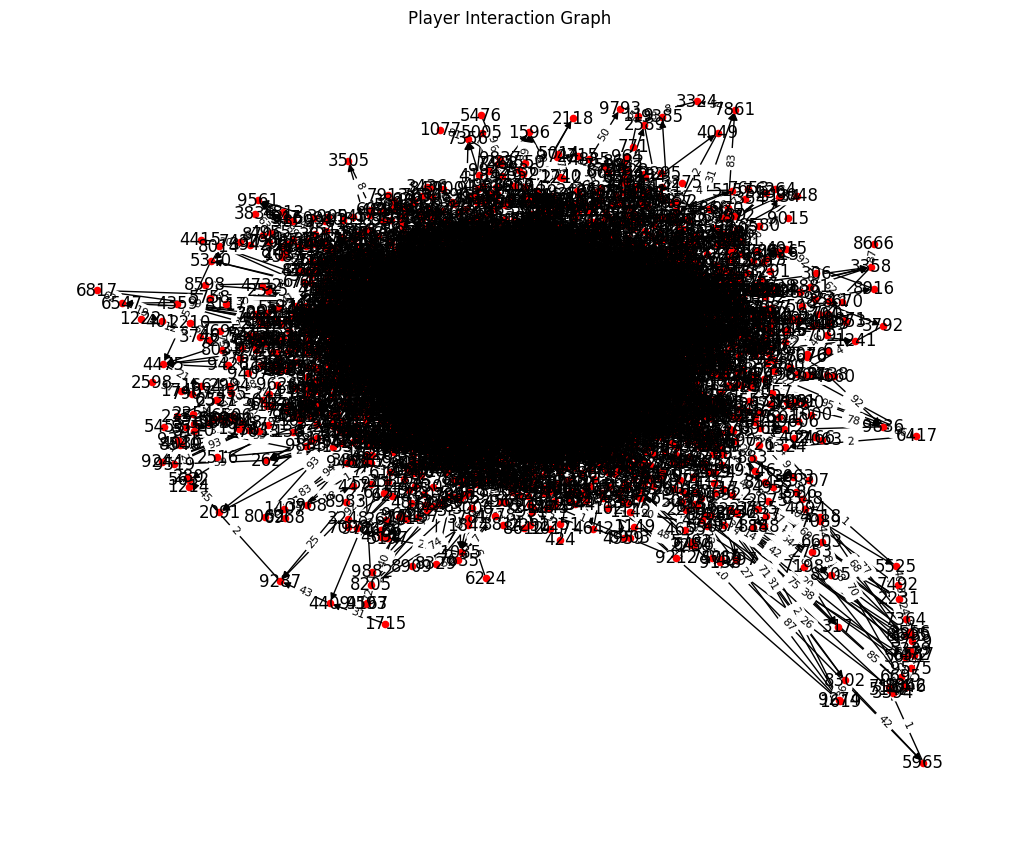

In [ ]:
pos = nx.spring_layout(G)  # Define the layout for the graph nodes
plt.figure(figsize=(10, 8))  # Set the size of the plot

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=20, node_color='red', font_weight='normal', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)

plt.title('Player Interaction Graph')
plt.show()

***Calculating the Net_Flow for each player***

In [ ]:
# Calculate the net outflow and net inflow for each player
net_outflow = {player: sum(edge[2]['weight'] for edge in G.out_edges(player, data=True)) for player in players}
net_inflow = {player: sum(edge[2]['weight'] for edge in G.in_edges(player, data=True)) for player in players}

# Calculate the net flow for each player
net_flow = {player: net_inflow[player] - net_outflow[player] for player in players}

***Calculating the Net flow of each player & Forming Clusters based on positive and negetive net flow***

In [ ]:
import matplotlib.patches as mpatches

positive_inflow_cluster = [player for player, flow in net_flow.items() if flow > 0]
negative_inflow_cluster = [player for player, flow in net_flow.items() if flow <= 0]

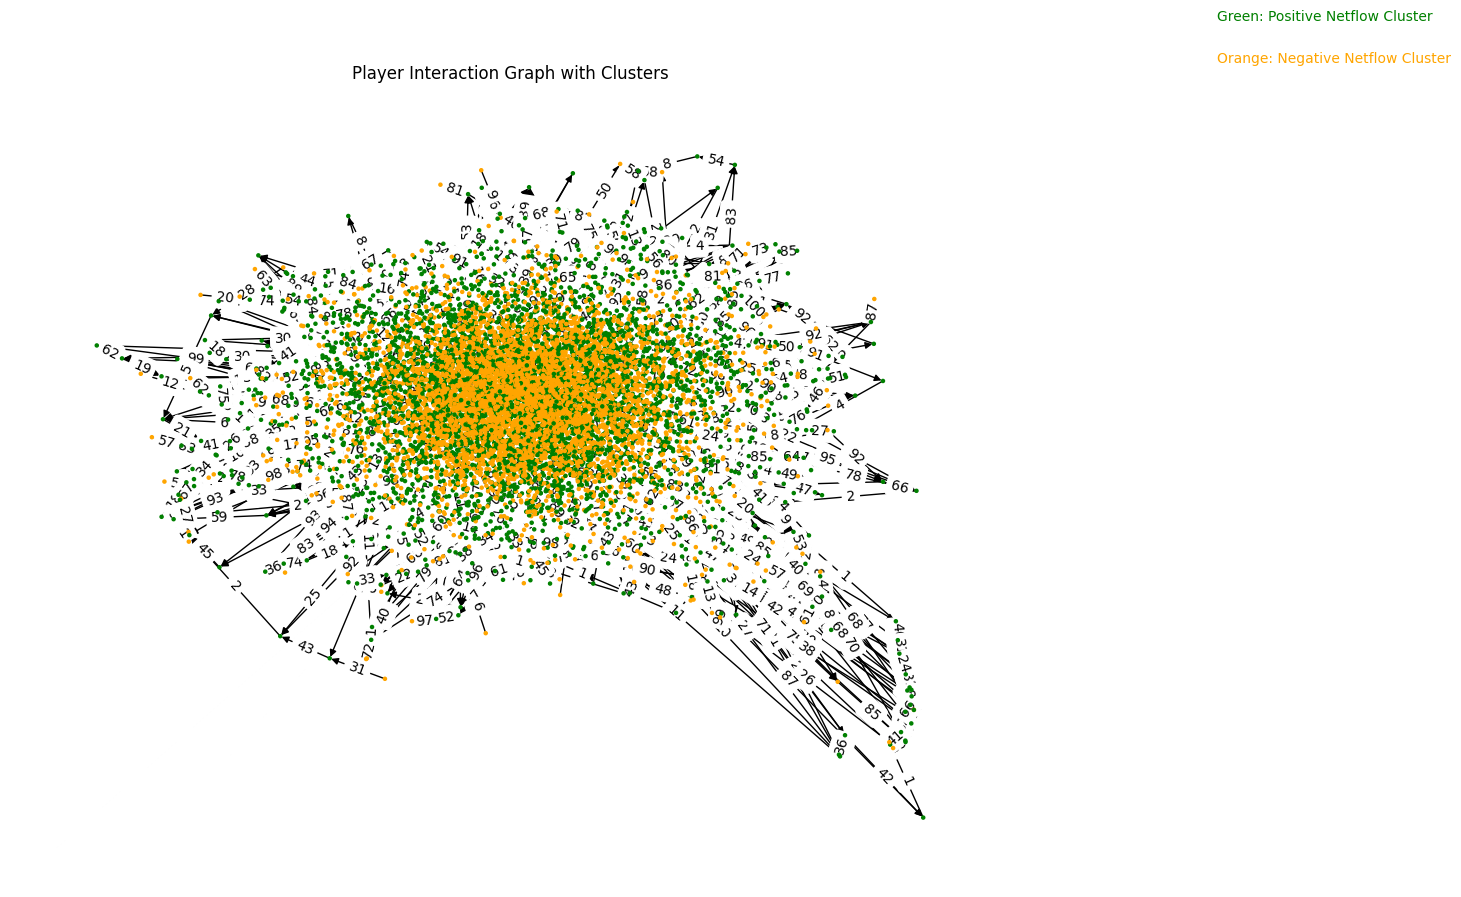

In [ ]:
# Assigning colors to different clusters for visualization
node_colors = {player: 'skyblue' for player in players}  # Default color for nodes not in any cluster

for player in positive_inflow_cluster:
    node_colors[player] = 'green'  # Positive inflow cluster in green

for player in negative_inflow_cluster:
    node_colors[player] = 'orange'  # Negative inflow cluster in orange

# Draw the graph with different colors for clusters
plt.figure(figsize=(10, 8))

# Draw nodes and edges with specified node colors
nx.draw(G, pos, with_labels=False, node_size=5, arrows=True,
        node_color=[node_colors[player] for player in players],
        font_weight='bold')

# Define legend labels
legend_labels = {
    'green': 'Positive Netflow Cluster',
    'orange': 'Negative Netflow Cluster'
}

# Place legend labels at the desired positions
plt.text(1, 0.9, f"Green: {legend_labels['green']}", color='green')
plt.text(1, 0.8, f"Orange: {legend_labels['orange']}", color='orange')

# Other plotting configurations
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Player Interaction Graph with Clusters')

plt.show()

***Calculating average degree (threshold) of the whole network & Plotting the Degree Distribution graph and Degree Distribution on log-log table***

In [ ]:
import numpy as np

# Calculate the degree for each node and store it in a list
degrees = [G.degree(node) for node in players]

# Calculate the average degree
average_degree = sum(degrees) / len(players)

# Print the average degree
print(f"Average Degree: {average_degree:.4f}")



Average Degree: 3.8000


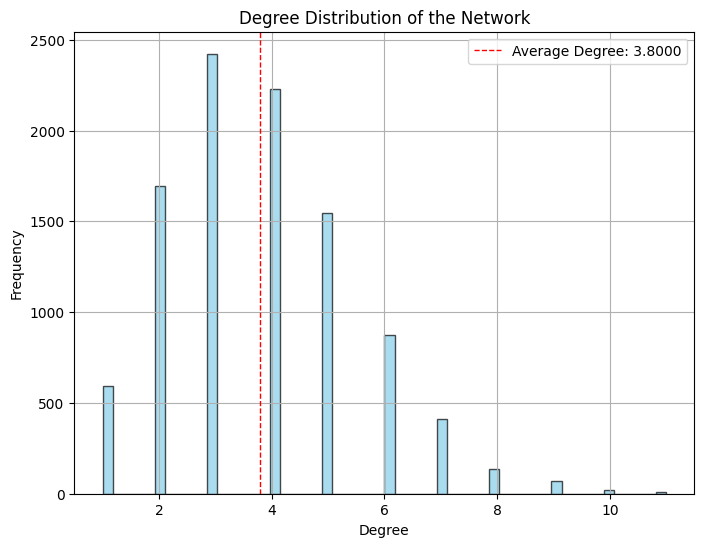

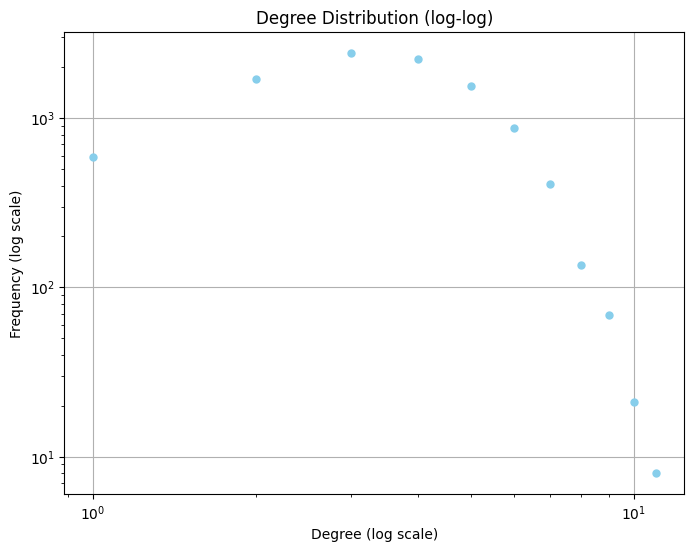

In [ ]:
# Plotting the degree distribution histogram
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins='auto', alpha=0.7, color='skyblue', edgecolor='black')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Network')
plt.axvline(x=average_degree, color='red', linestyle='dashed', linewidth=1, label=f'Average Degree: {average_degree:.4f}')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the degree distribution on a log-log scale
plt.figure(figsize=(8, 6))

# Convert degrees into arrays for log-log plot
degrees_log = np.array(degrees)

# Filter out degrees with value 0 to avoid log(0) issues
degrees_log = degrees_log[degrees_log != 0]

plt.loglog(np.unique(degrees_log), np.bincount(degrees_log)[np.unique(degrees_log)], 'o', color='skyblue', markersize=5)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (log-log)')
plt.grid(True)
plt.show()


***Calculating the Degree of each player & Forming Clusters after comparing with average degree of the whole network***

In [ ]:
import matplotlib.patches as mpatches

# Create the degree based on the number of connections
degree_of_players = {player: G.degree(player) for player in players}

# Form clusters based on the degree distribution (for example, clusters based on degrees above a threshold)
threshold_degree = average_degree  # Adjust the threshold as needed
high_degree_cluster = [player for player, degree in degree_of_players.items() if degree > threshold_degree]
low_degree_cluster = [player for player, degree in degree_of_players.items() if degree <= threshold_degree]




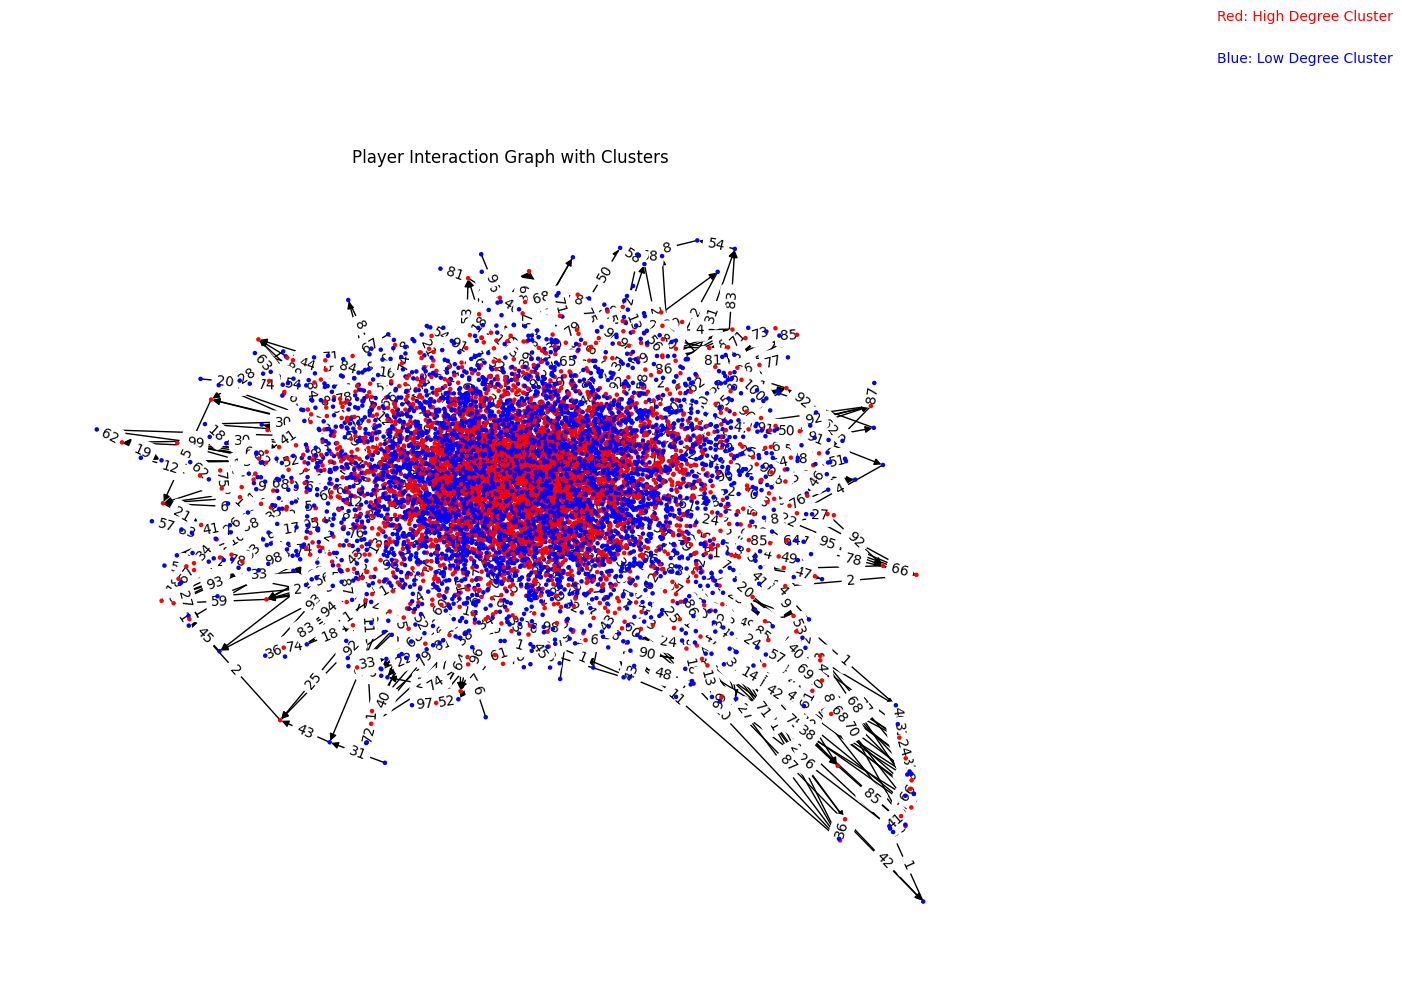

In [ ]:
# Assigning colors to different clusters for visualization
node_colors = {player: 'skyblue' for player in players}  # Default color for nodes not in any cluster

for player in high_degree_cluster:
    node_colors[player] = 'red'  # High degree cluster in red

for player in low_degree_cluster:
    node_colors[player] = 'blue'  # Low degree cluster in blue

# Draw the graph with different colors for clusters
plt.figure(figsize=(10, 8))

# Draw nodes and edges with specified node colors
nx.draw(G, pos, with_labels=False, node_size=5, arrows=True,
        node_color=[node_colors[player] for player in players],
        font_weight='bold')

# Define legend labels
legend_labels = {
    'red': 'High Degree Cluster',
    'blue': 'Low Degree Cluster',
}

# Place legend labels at the desired positions
plt.text(1, 1.1, f"Red: {legend_labels['red']}", color='red')
plt.text(1, 1, f"Blue: {legend_labels['blue']}", color='blue')

# Other plotting configurations
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Player Interaction Graph with Clusters')

plt.show()

***Calculating the average pagerank(threshold) of the whole network***

In [ ]:
# Calculate the PageRank for each node
pagerank = nx.pagerank(G)

# Calculate the average PageRank
average_pagerank = sum(pagerank.values()) / len(pagerank)

# Print the average PageRank
print(f"Average PageRank of Nodes: {average_pagerank:.4f}")

Average PageRank of Nodes: 0.0001


In [ ]:
pagerank = nx.pagerank(G)

# Define the PageRank threshold for clustering
threshold_pagerank = average_pagerank  # Adjust the threshold as needed

# Form clusters based on the PageRank threshold
high_pagerank_cluster = [player for player, rank in pagerank.items() if rank > threshold_pagerank]
low_pagerank_cluster = [player for player, rank in pagerank.items() if rank <= threshold_pagerank]

***Calculating the Pagerank of each node & Forming Clusters after comparing with average pagerank of the whole network***

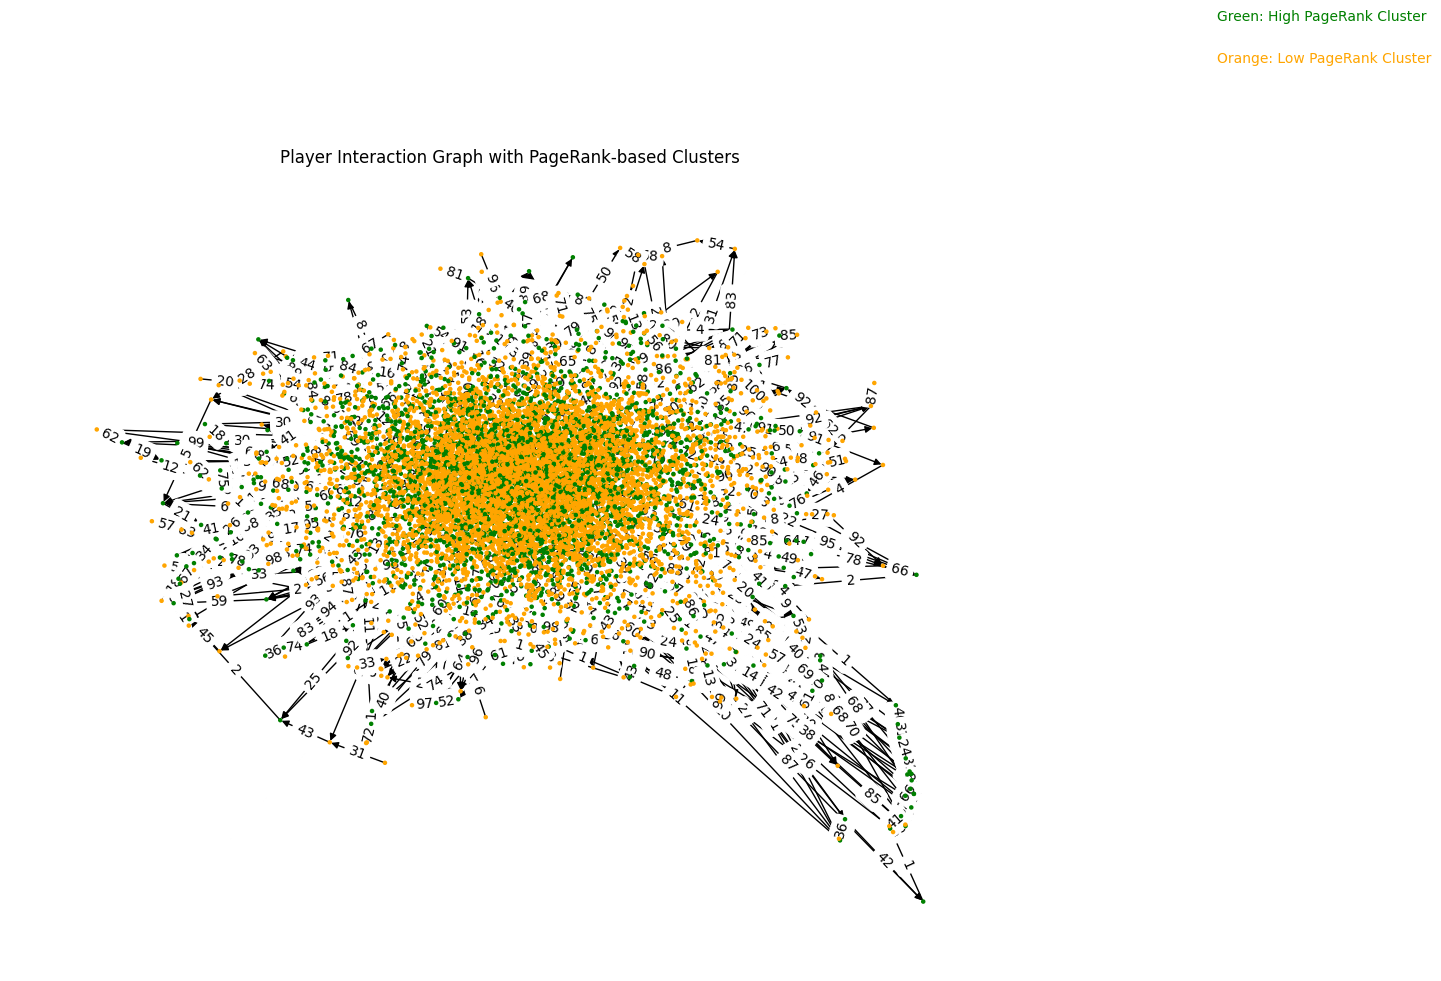

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the figure size
plt.figure(figsize=(10, 8))

# Assign colors to nodes based on PageRank clusters
for player in players:
    if player in high_pagerank_cluster:
        node_colors[player] = 'green'  # Nodes with high PageRank in green
    elif player in low_pagerank_cluster:
        node_colors[player] = 'orange'  # Nodes with low PageRank in orange

# Draw nodes and edges with specified node colors based on PageRank clusters
nx.draw(G, pos, with_labels=False, node_size=5, arrows=True,
        node_color=[node_colors[player] for player in players],
        font_weight='bold')

# Define legend labels
legend_labels = {
    'green': 'High PageRank Cluster',
    'orange': 'Low PageRank Cluster'
}

# Place legend labels at the desired positions
plt.text(1, 1.1, f"Green: {legend_labels['green']}", color='green')
plt.text(1, 1, f"Orange: {legend_labels['orange']}", color='orange')

# Other plotting configurations
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Player Interaction Graph with PageRank-based Clusters')

plt.show()


***Creating a cluster based on high authorativeness of the players***

In [ ]:
# Create a HUB of high quality players
# Consider players in clusters with high degree, high PageRank, and positive net flow
high_degree_cluster = set([player for player, degree in degree_of_players.items() if degree > threshold_degree])
high_pagerank_cluster = set([player for player, rank in pagerank.items() if rank > threshold_pagerank])
positive_netflow_cluster = set([player for player, flow in net_flow.items() if flow > 0])

# Find the intersection of these clusters
high_quality_players = high_degree_cluster.intersection(high_pagerank_cluster, positive_netflow_cluster)
high_quality_players = sorted(list(high_quality_players))
print(len(high_quality_players))
# Print or process the nodes that meet all criteria
print("Nodes with high degree, high PageRank, and positive net flow:")
#for player in high_quality_players:
#    print(player)

2015
Nodes with high degree, high PageRank, and positive net flow:


In [ ]:
# Calculate Authority scores of the node graph
# Initialize a dictionary to hold scores for each node, starting with 0 for all nodes
authority_scores = {player: 0 for player in G.nodes()}

# Iterate through all nodes in the graph
for player in G.nodes():
    # Check the out-edges for each node
    in_neighbors = G.in_edges(player)
    for _, target in in_neighbors:
        # Increment the score of the target node if it's in the high-quality players set
        if target in high_quality_players:
            authority_scores[player] += 1

# Print or process the scores for nodes
for player, score in authority_scores.items():
    print(f"Player {player}: Score {score}")


Streaming output truncated to the last 5000 lines.
Player 7273: Score 0
Player 2248: Score 2
Player 6312: Score 3
Player 4424: Score 0
Player 2249: Score 0
Player 2250: Score 0
Player 2251: Score 0
Player 8817: Score 0
Player 2252: Score 0
Player 3387: Score 0
Player 2254: Score 0
Player 2255: Score 0
Player 2881: Score 0
Player 2256: Score 3
Player 3500: Score 0
Player 2258: Score 0
Player 9534: Score 0
Player 2259: Score 0
Player 2260: Score 0
Player 3041: Score 0
Player 4255: Score 0
Player 2262: Score 0
Player 6636: Score 0
Player 9048: Score 0
Player 8361: Score 0
Player 2263: Score 0
Player 3122: Score 0
Player 2264: Score 0
Player 7330: Score 0
Player 5964: Score 0
Player 4923: Score 0
Player 2266: Score 0
Player 3066: Score 0
Player 8277: Score 0
Player 8066: Score 0
Player 2948: Score 0
Player 9065: Score 2
Player 2270: Score 0
Player 4069: Score 0
Player 2271: Score 0
Player 4461: Score 0
Player 2272: Score 4
Player 2273: Score 0
Player 2274: Score 0
Player 2275: Score 0
Play

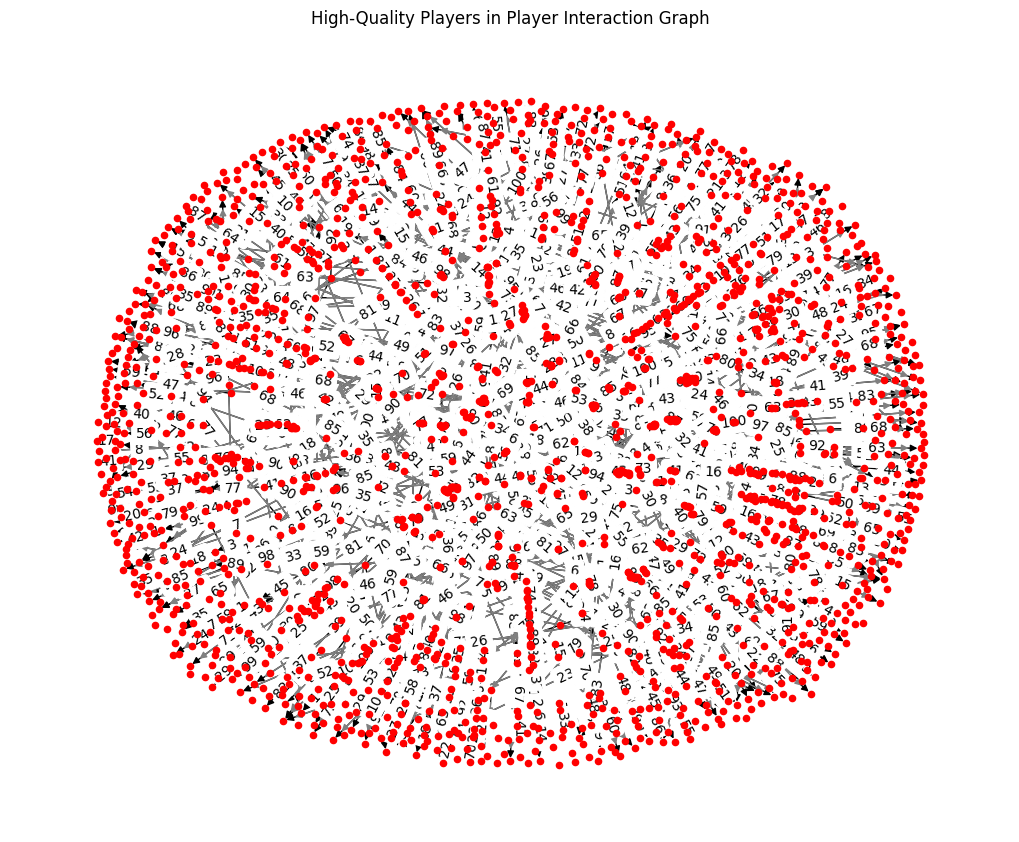

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is the original graph and 'high_quality_players' is a list of high-quality player nodes

# Create the subgraph containing only high-quality players
high_quality_subgraph = G.subgraph(high_quality_players)

# Define the layout for the high-quality nodes
pos_high_quality = nx.spring_layout(high_quality_subgraph)

# Draw the high-quality nodes on the graph
plt.figure(figsize=(10, 8))  # Set the size of the plot

# Draw nodes and edges for high-quality nodes
nx.draw(high_quality_subgraph, pos=pos_high_quality, with_labels=False, node_size=20, node_color='red', font_weight='bold', arrows=True)
nx.draw_networkx_edges(high_quality_subgraph, pos=pos_high_quality, edge_color='gray')

# Optionally, if you want to display edge labels (weights)
edge_labels = nx.get_edge_attributes(high_quality_subgraph, 'weight')
nx.draw_networkx_edge_labels(high_quality_subgraph, pos=pos_high_quality, edge_labels=edge_labels)

plt.title('High-Quality Players in Player Interaction Graph')
plt.show()


***Checking for a particular player which players have not played match between them yet***

In [ ]:
import networkx as nx

# Function to read data from the .edges file
def read_edges_file(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as file:
        for line in file:
            try:
                source, target, weight = map(int, line.strip().split())
                G.add_edge(source, target, weight=weight)
            except ValueError:
                print(f"Skipping line: {line.strip()} (Invalid format)")
                continue
    return G

# Read the graph data from the .edges file
edges_file = 'Poker_modified.edges'
G = read_edges_file(edges_file)

# Get the list of all players (nodes)
players = list(G.nodes())

# Take input from the user for the selected node
selected_node = int(input("Enter the node you want to analyze: "))

# Generate pairs of the selected node with all other players
selected_node_pairs = [(selected_node, player) for player in players if player != selected_node]

# Find pairs of the selected node who have not played any match
not_played_pairs = []
for player_pair in selected_node_pairs:
   if not G.has_edge(player_pair[0], player_pair[1]) and not G.has_edge(player_pair[1], player_pair[0]):
        not_played_pairs.append(player_pair)

# Sort the not_played_pairs in ascending order
not_played_pairs.sort()

# Print the pairs of players who have never played any match with the selected node
if not not_played_pairs:
    print(f"Player {selected_node} has played at least one match with all other players.")
else:
    print(f"Player {selected_node} has never played any match with the following players:")
    for player_pair in not_played_pairs:
        print(f"{player_pair[1]}")

Streaming output truncated to the last 5000 lines.
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188

***Who is likely to win***

In [ ]:
# Weights for each parameter
weight_degree = 1
weight_pagerank = 1
weight_net_flow = 1
weight_auth_score = 2

# Take input for player_A and player_B
player_A = int(input("Enter the Player 1: "))
player_B = int(input("Enter the Player 2: "))

# Get the relevant data for the players
degree_A = degree_of_players.get(player_A, 0)
degree_B = degree_of_players.get(player_B, 0)

pagerank_A = pagerank.get(player_A, 0)
pagerank_B = pagerank.get(player_B, 0)

net_flow_A = net_flow.get(player_A, 0)
net_flow_B = net_flow.get(player_B, 0)

auth_score_A = authority_scores[player_A]
auth_score_B = authority_scores[player_B]

score_A = 0
score_B = 0
if(degree_A> degree_B):
  score_A= score_A + weight_degree
elif(degree_A == degree_B):
  score_A = score_A + weight_degree
  score_B = score_B + weight_degree
else:
  score_B = score_B + weight_degree


if(pagerank_A > pagerank_B):
  score_A= score_A + weight_pagerank
elif(pagerank_A == pagerank_B):
  score_A = score_A + weight_pagerank
  score_B = score_B + weight_pagerank
else:
  score_B = score_B+ weight_pagerank


if(net_flow_A> net_flow_B):
  score_A= score_A + weight_net_flow
elif(net_flow_A == net_flow_B):
  score_A = score_A + weight_net_flow
  score_B = score_B + weight_net_flow
else:
  score_B = score_B+ weight_net_flow


if(auth_score_A > auth_score_B):
  score_A =score_A + weight_auth_score
elif(auth_score_A == auth_score_B):
  score_A = score_A + weight_auth_score
  score_B = score_B + weight_auth_score
else:
  score_B = score_B + weight_auth_score

print("Score of player 1: ", score_A)
print("Score of player 2: ", score_B)

# Determine the likely winner
if score_A > score_B:
    print(f"Player {player_A} is likely to win.")
elif score_B > score_A:
    print(f"Player {player_B} is likely to win.")
else:
    print("It's a close match, and the outcome is uncertain.")

Enter the Player 1: 5
Enter the Player 2: 10
Score of player 1:  1
Score of player 2:  5
Player 10 is likely to win.
